<a href="https://www.kaggle.com/code/eavprog/abscur-reit-stabil?scriptVersionId=133972112" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг стабильности валют по абсолютным курсам

Ранжируем валюты по убыванию нормированного стандартного отклонения их абсолютных курсов (делим стандартное отклонение на среднее значение). Расчет производим за разные временные промежутки от месяца до 5 лет.

---

# Оглавление проекта "Абсолютный валютный курс" 

![Проект "Абсолютный валютный курс"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/@eavprog8/community) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/s/1826351-absolyutnyy-kurs-valyut) - 
[**Kaggle**](https://www.kaggle.com/code/eavprog/abscur-about)

## Абсолютные валютные курсы:
- [О проекте](https://www.kaggle.com/eavprog/abscur-about)
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Парные валютные курсы
- [Графики истории парных валютных курсов](https://www.kaggle.com/eavprog/abscur-par-hist)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц

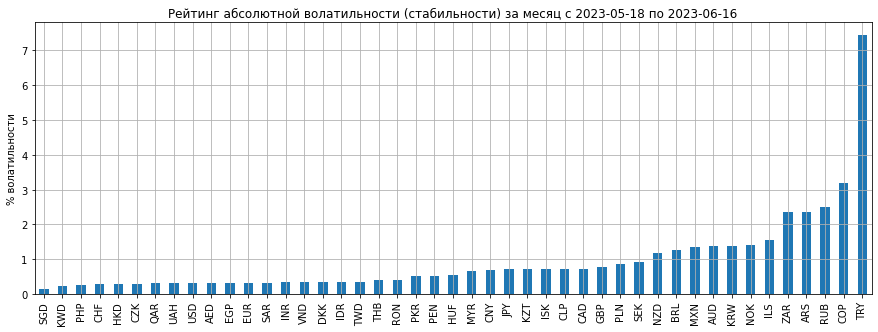

**Самые стабильные и волатильные валюты за месяц:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**SGD**|0.142%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|**KWD**|0.244%|Кувейтский динар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B2%D0%B5%D0%B9%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B8%D0%BD%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KWD)|
|**PHP**|0.263%|Филиппинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D0%B8%D0%BF%D0%BF%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PHP)|
|**CHF**|0.282%|Швейцарский франк|[wiki](https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CHF)|
|**HKD**|0.287%|Гонконгский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BD%D0%BA%D0%BE%D0%BD%D0%B3%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#HKD)|
|...|...|...|...|
|**ZAR**|2.359%|Южноафриканский рэнд|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%B0%D1%84%D1%80%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%8D%D0%BD%D0%B4), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ZAR)|
|**ARS**|2.362%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**RUB**|2.504%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**COP**|3.188%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**TRY**|7.44%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|


См.также: [**Рейтинг абсолютной доходности за месяц**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-месяц), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-месяц), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за месяц**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-месяц), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-месяц), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за месяц**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-месяц)

# За квартал

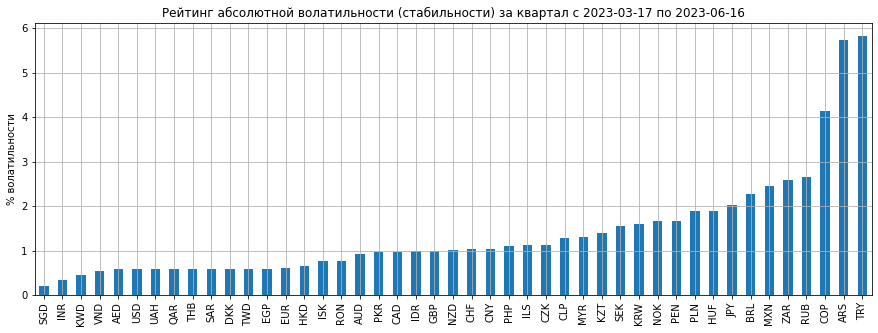

**Самые стабильные и волатильные валюты за квартал:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**SGD**|0.203%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|**INR**|0.347%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**KWD**|0.461%|Кувейтский динар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B2%D0%B5%D0%B9%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B8%D0%BD%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KWD)|
|**VND**|0.545%|Вьетнамский донг|[wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%BD%D0%B3), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#VND)|
|**AED**|0.583%|Дирхам ОАЭ|[wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%80%D1%85%D0%B0%D0%BC_%D0%9E%D0%90%D0%AD), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#AED)|
|...|...|...|...|
|**ZAR**|2.591%|Южноафриканский рэнд|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%B0%D1%84%D1%80%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%8D%D0%BD%D0%B4), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ZAR)|
|**RUB**|2.666%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**COP**|4.133%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**ARS**|5.75%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**TRY**|5.826%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|


См.также: [**Рейтинг абсолютной доходности за квартал**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-квартал), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-квартал), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за квартал**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-квартал), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-квартал), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за квартал**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-квартал)

# За полгода

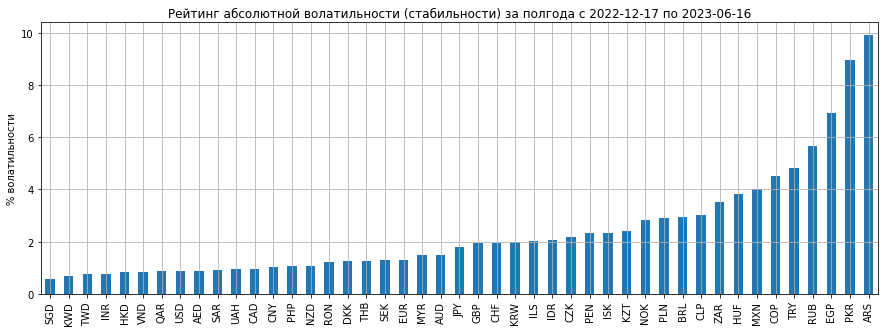

**Самые стабильные и волатильные валюты за полгода:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**SGD**|0.589%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|**KWD**|0.676%|Кувейтский динар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B2%D0%B5%D0%B9%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B8%D0%BD%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KWD)|
|**TWD**|0.749%|Новый тайваньский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D1%82%D0%B0%D0%B9%D0%B2%D0%B0%D0%BD%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TWD)|
|**INR**|0.75%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**HKD**|0.827%|Гонконгский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BD%D0%BA%D0%BE%D0%BD%D0%B3%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#HKD)|
|...|...|...|...|
|**TRY**|4.815%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**RUB**|5.663%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**EGP**|6.92%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**PKR**|8.96%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**ARS**|9.901%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг абсолютной доходности за полгода**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-полгода), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-полгода), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за полгода**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-полгода), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-полгода), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за полгода**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-полгода)

# За год

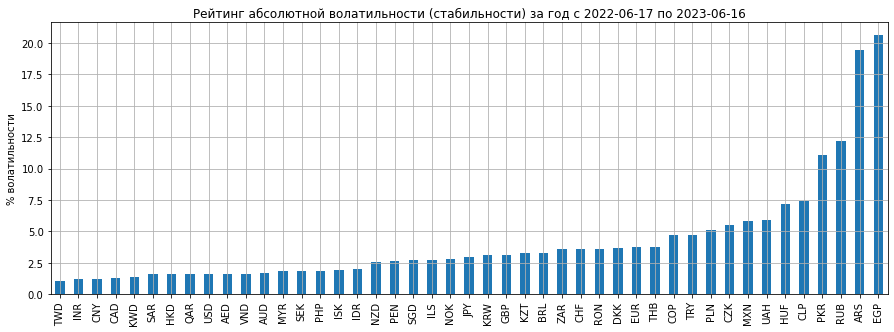

**Самые стабильные и волатильные валюты за год:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**TWD**|1.064%|Новый тайваньский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D1%82%D0%B0%D0%B9%D0%B2%D0%B0%D0%BD%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TWD)|
|**INR**|1.212%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**CNY**|1.232%|Китайский юань|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D1%82%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%8E%D0%B0%D0%BD%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CNY)|
|**CAD**|1.306%|Канадский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%BD%D0%B0%D0%B4%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CAD)|
|**KWD**|1.372%|Кувейтский динар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B2%D0%B5%D0%B9%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%B8%D0%BD%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KWD)|
|...|...|...|...|
|**CLP**|7.404%|Чилийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CLP)|
|**PKR**|11.102%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**RUB**|12.193%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**ARS**|19.454%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**EGP**|20.625%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|


См.также: [**Рейтинг абсолютной доходности за год**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-год), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-год), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за год**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-год), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-год), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за год**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-год)

# За 2 года

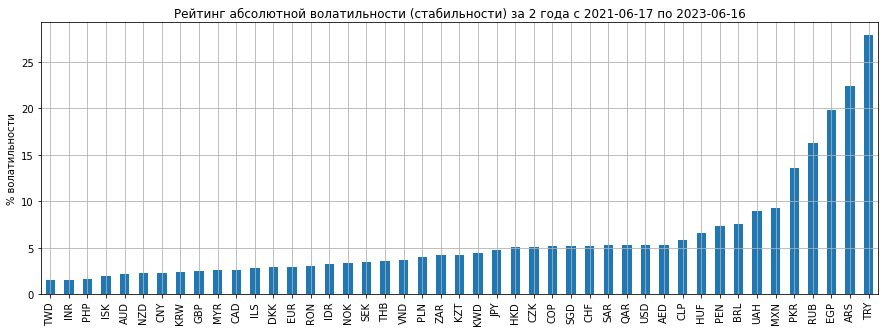

**Самые стабильные и волатильные валюты за 2 года:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**TWD**|1.52%|Новый тайваньский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D0%B2%D1%8B%D0%B9_%D1%82%D0%B0%D0%B9%D0%B2%D0%B0%D0%BD%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TWD)|
|**INR**|1.564%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**PHP**|1.595%|Филиппинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D0%B8%D0%BF%D0%BF%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PHP)|
|**ISK**|1.981%|Исландская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D1%81%D0%BB%D0%B0%D0%BD%D0%B4%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ISK)|
|**AUD**|2.185%|Австралийский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%81%D1%82%D1%80%D0%B0%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#AUD)|
|...|...|...|...|
|**PKR**|13.578%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**RUB**|16.218%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**EGP**|19.827%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**ARS**|22.398%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**TRY**|27.861%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|


См.также: [**Рейтинг абсолютной доходности за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-2-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-2-года), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 2 года**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-2-года), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-2-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 2 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-2-года)

# За 3 года

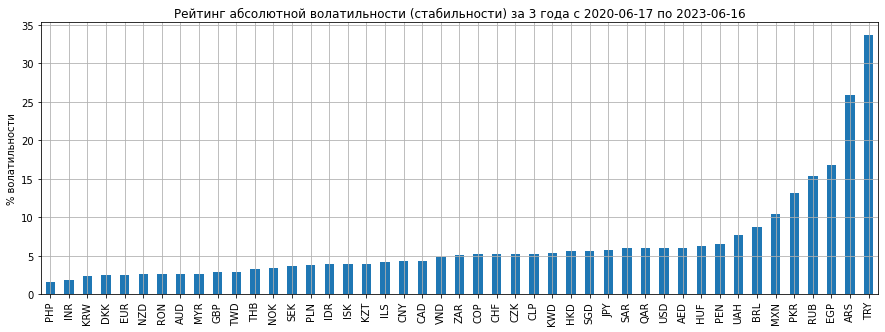

**Самые стабильные и волатильные валюты за 3 года:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**PHP**|1.544%|Филиппинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D0%B8%D0%BF%D0%BF%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PHP)|
|**INR**|1.873%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**KRW**|2.398%|Южнокорейская вона|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%BA%D0%BE%D1%80%D0%B5%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D0%B2%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KRW)|
|**DKK**|2.487%|Датская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%B0%D1%82%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#DKK)|
|**EUR**|2.507%|Евро|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B2%D1%80%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EUR)|
|...|...|...|...|
|**PKR**|13.081%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**RUB**|15.341%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**EGP**|16.822%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**ARS**|25.905%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|
|**TRY**|33.62%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|


См.также: [**Рейтинг абсолютной доходности за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-3-года), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-3-года), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 3 года**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-3-года), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-3-года), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 3 года**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-3-года)

# За 5 лет

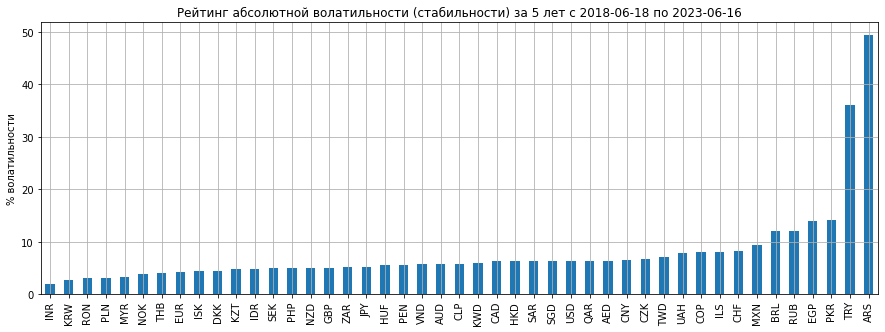

**Самые стабильные и волатильные валюты за 5 лет:**

|код|волатильность|расшифровка|ссылки|
|-|-|-|-|
|**INR**|1.871%|Индийская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B8%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#INR)|
|**KRW**|2.619%|Южнокорейская вона|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%BA%D0%BE%D1%80%D0%B5%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D0%B2%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KRW)|
|**RON**|2.979%|Румынский лей|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D1%83%D0%BC%D1%8B%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%BB%D0%B5%D0%B9), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RON)|
|**PLN**|3.124%|Польский злотый|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B7%D0%BB%D0%BE%D1%82%D1%8B%D0%B9), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PLN)|
|**MYR**|3.316%|Малайзийский ринггит|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%BB%D0%B0%D0%B9%D0%B7%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%BD%D0%B3%D0%B3%D0%B8%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MYR)|
|...|...|...|...|
|**RUB**|12.09%|Российский рубль|[wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%83%D0%B1%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#RUB)|
|**EGP**|13.882%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**PKR**|14.038%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**TRY**|36.052%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|49.315%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг абсолютной доходности за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-5-лет), [**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-5-лет), [**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-5-лет), [**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-5-лет), [**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-5-лет)

In [1]:
import numpy as np
import pandas as pd
import abscur_menu
from IPython.display import Markdown, display
import datetime
import matplotlib.pyplot as plt
import abscur_post as ap

abscur_menu.print_menu()

abscur = pd.read_csv("/kaggle/input/abscur-data/abscur.csv",index_col=0,parse_dates=['Date'])
ras_cur = pd.read_csv("/kaggle/input/abscur-data/cur_ras.csv",index_col=0)
cur_ras = ras_cur

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

cnt = 0
texts = []

for per,title_per in diap:
    display(Markdown("# За "+title_per))
    
    date_start = abscur.asfreq(freq="D").index[-per]
    date_finish = abscur.index[-1]
    
    res = abscur[abscur.index >= date_start]
    res = res.std()/res.mean()*100
    res.sort_values(ascending=True,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг абсолютной волатильности (стабильности) за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="% волатильности",legend=False,figsize=(15,5))
    plt.savefig(str(cnt) + ".png")
    plt.show()
    
    text = "**Самые стабильные и волатильные валюты за " + title_per + ":**\n\n"
    text += "|код|волатильность|расшифровка|ссылки|\n"
    text += "|-|-|-|-|\n"
    for n in range(5):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
    text += "|...|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    text = "Самые стабильные валюты за " + title_per + ":\n"
    text_post = "Самые стабильные валюты за " + title_per + ":\n"
    for name in res.index[:10]:
        text += "- **" + name + "** ([" + ras_cur.loc[name][0] + "](" + ras_cur.loc[name][1] + ")) - " + str(np.round(res[name],2)) + "%\n"
        text_post += name + " (" + ras_cur.loc[name][0] + ") - " + str(np.round(res[name],2)) + "%\n"
    text += "---"
    texts.append(text_post)
    cnt += 1
    
#     display(Markdown(text))
#     break
    
num = np.random.randint(cnt)
ap.send_img_and_text(str(num)+".png",texts[num] + "---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-reit-stabil")